In [1]:
%matplotlib notebook
from EIANN_utils import *
import matplotlib.pyplot as plt

In [2]:
# Initialize RNN
input_size = 7
output_size = n_choose_k(7,2)
fbi_size = 1
tau = 3
forward_steps = 10
backward_steps = 10
learning_rate = 2.999993E+00
seed = 42

network = FBI_RNN(input_size, output_size, fbi_size, learning_rate, seed=seed, tau=tau, forward_steps=forward_steps, backward_steps=backward_steps)

dataset = n_hot_patterns(n=2,length=input_size)

target = torch.eye(output_size)

for sample in dataset:
    network.forward(sample, store_history=True)

<IPython.core.display.Javascript object>


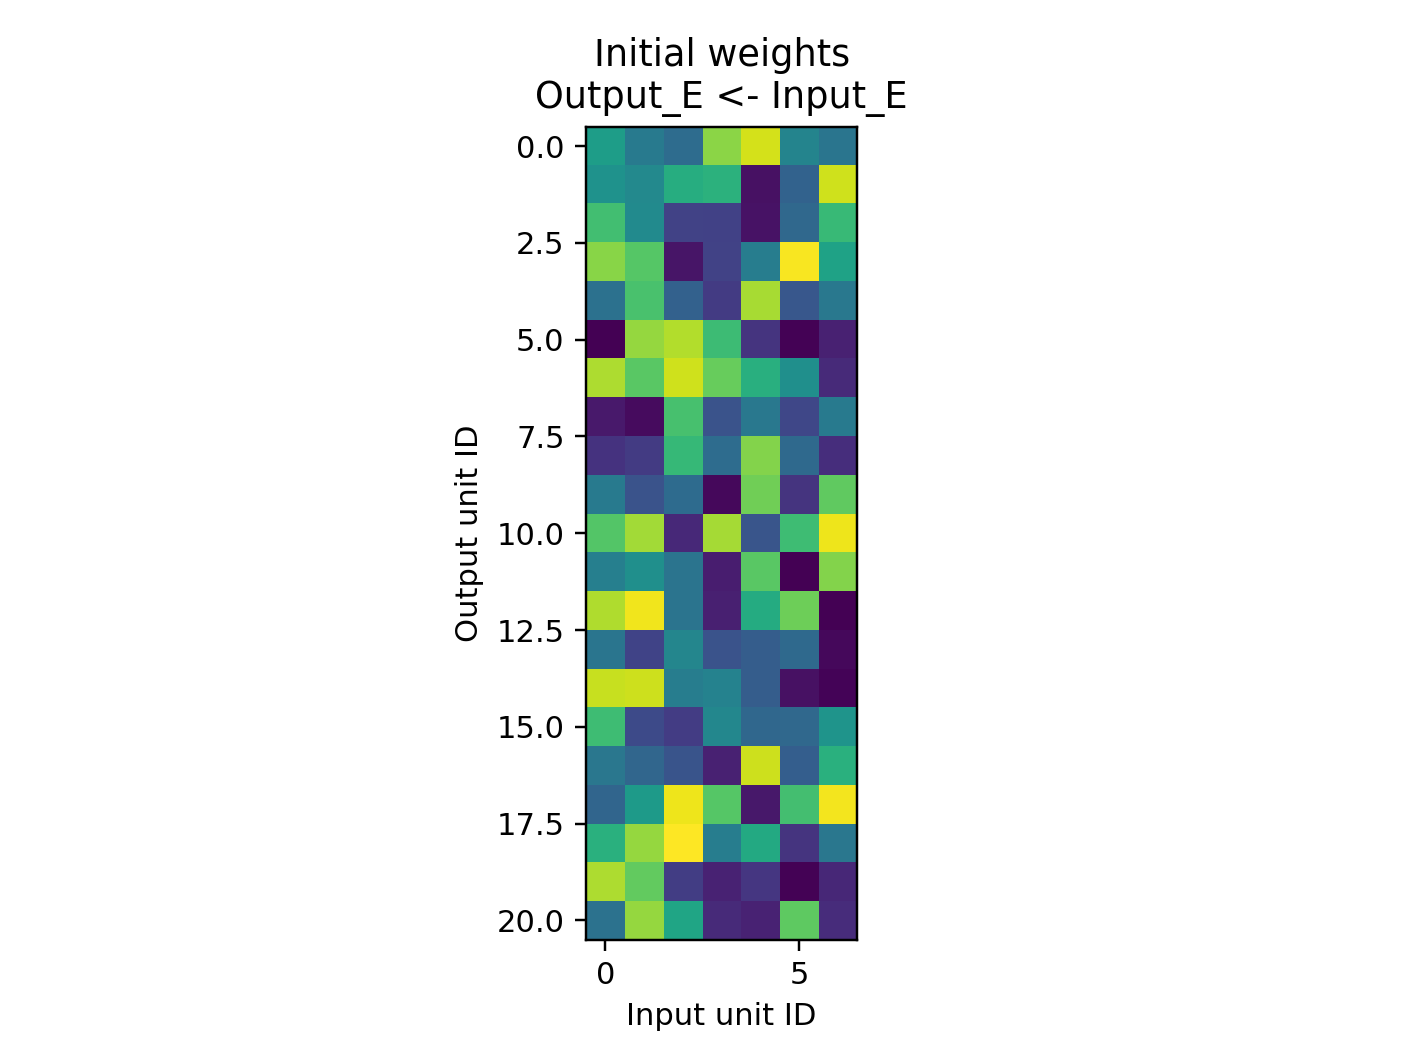

<IPython.core.display.Javascript object>


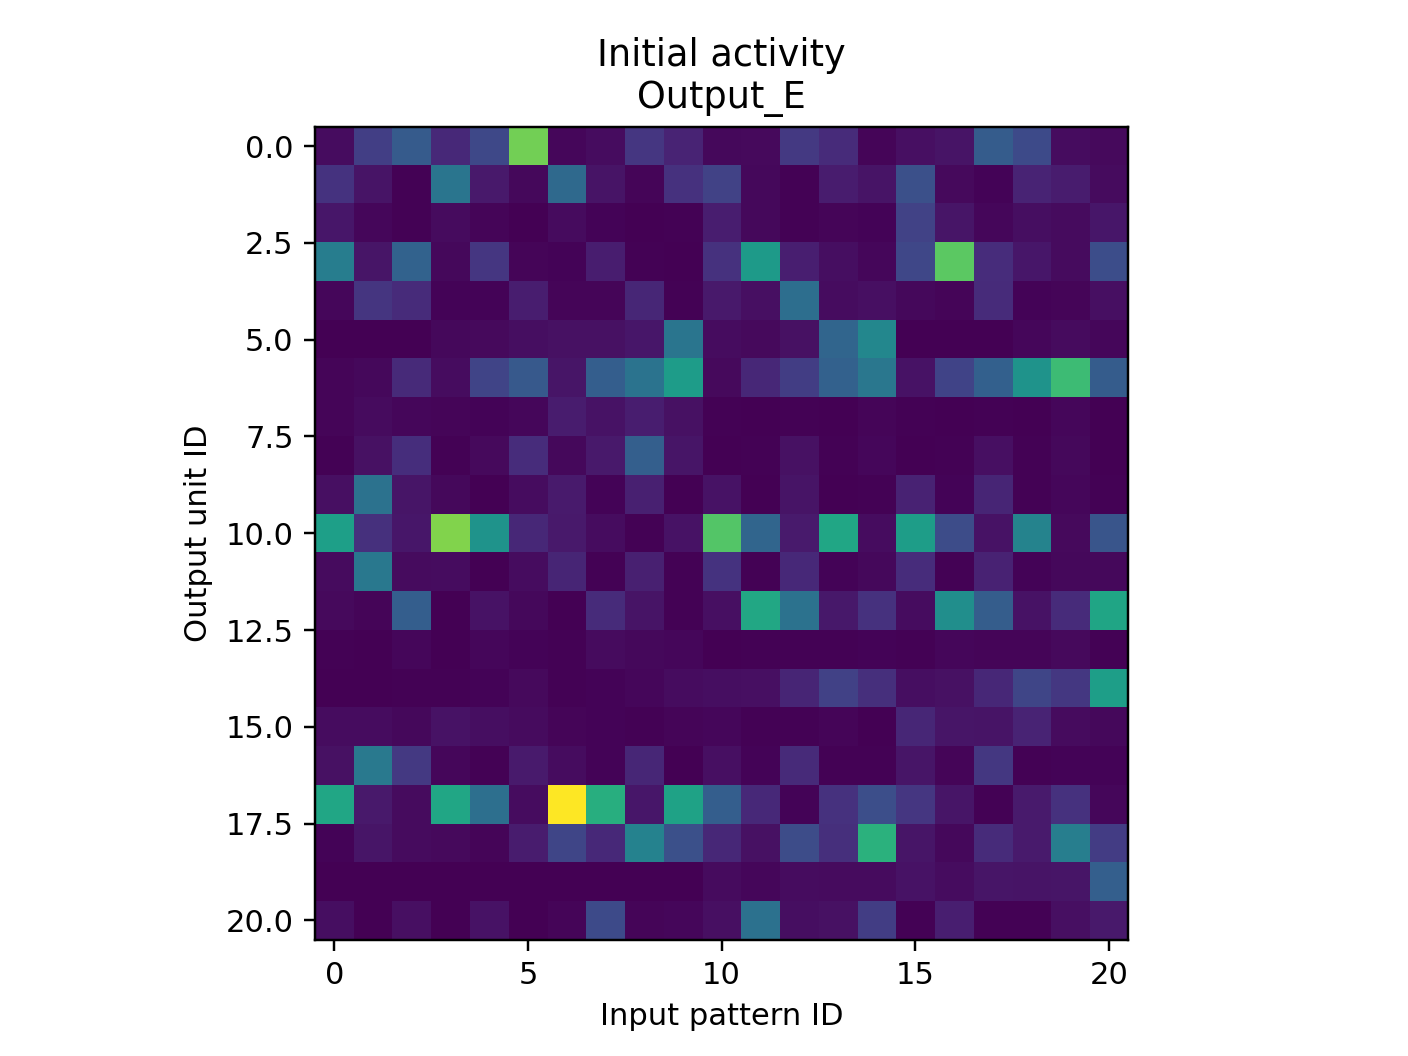

Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


In [3]:
plt.figure()
plt.imshow(network.layers['Output'].populations['E'].projections['Input']['E'].weight.data)
plt.colorbar()
plt.xlabel('Input unit ID')
plt.ylabel('Output unit ID')
plt.title('Initial weights\nOutput_E <- Input_E')

plt.figure()
plt.imshow(network.layers['Output'].populations['E'].activity_history[-dataset.shape[0]:,-1,:].T)
plt.colorbar()
plt.xlabel('Input pattern ID')
plt.ylabel('Output unit ID')
plt.title('Initial activity\nOutput_E')

for i, layer in enumerate(network.layers.values()):
    if i >0:
        for population in layer.populations.values():
            print(layer.name, population.name, population.bias)

In [4]:
network.reset_history()

epochs=300

network.train(dataset, target, epochs, store_history=True, shuffle=True, status_bar=True)

100%|██████████| 300/300 [00:22<00:00, 13.42it/s]


tensor(2.2225e-05, grad_fn=<MseLossBackward0>)

<IPython.core.display.Javascript object>


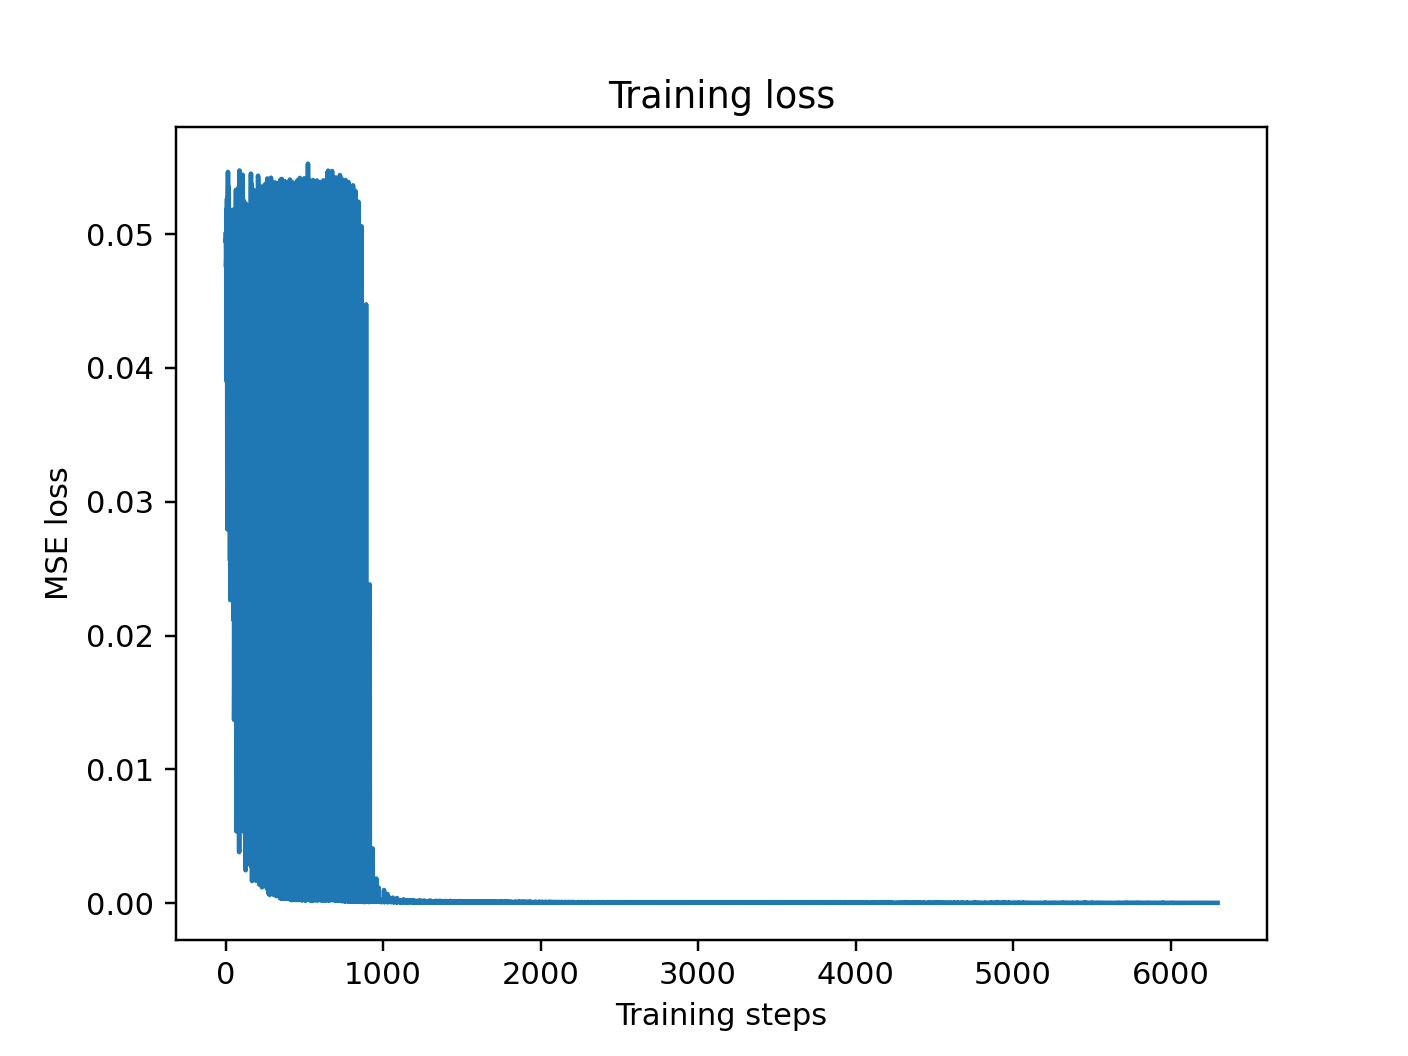

<IPython.core.display.Javascript object>


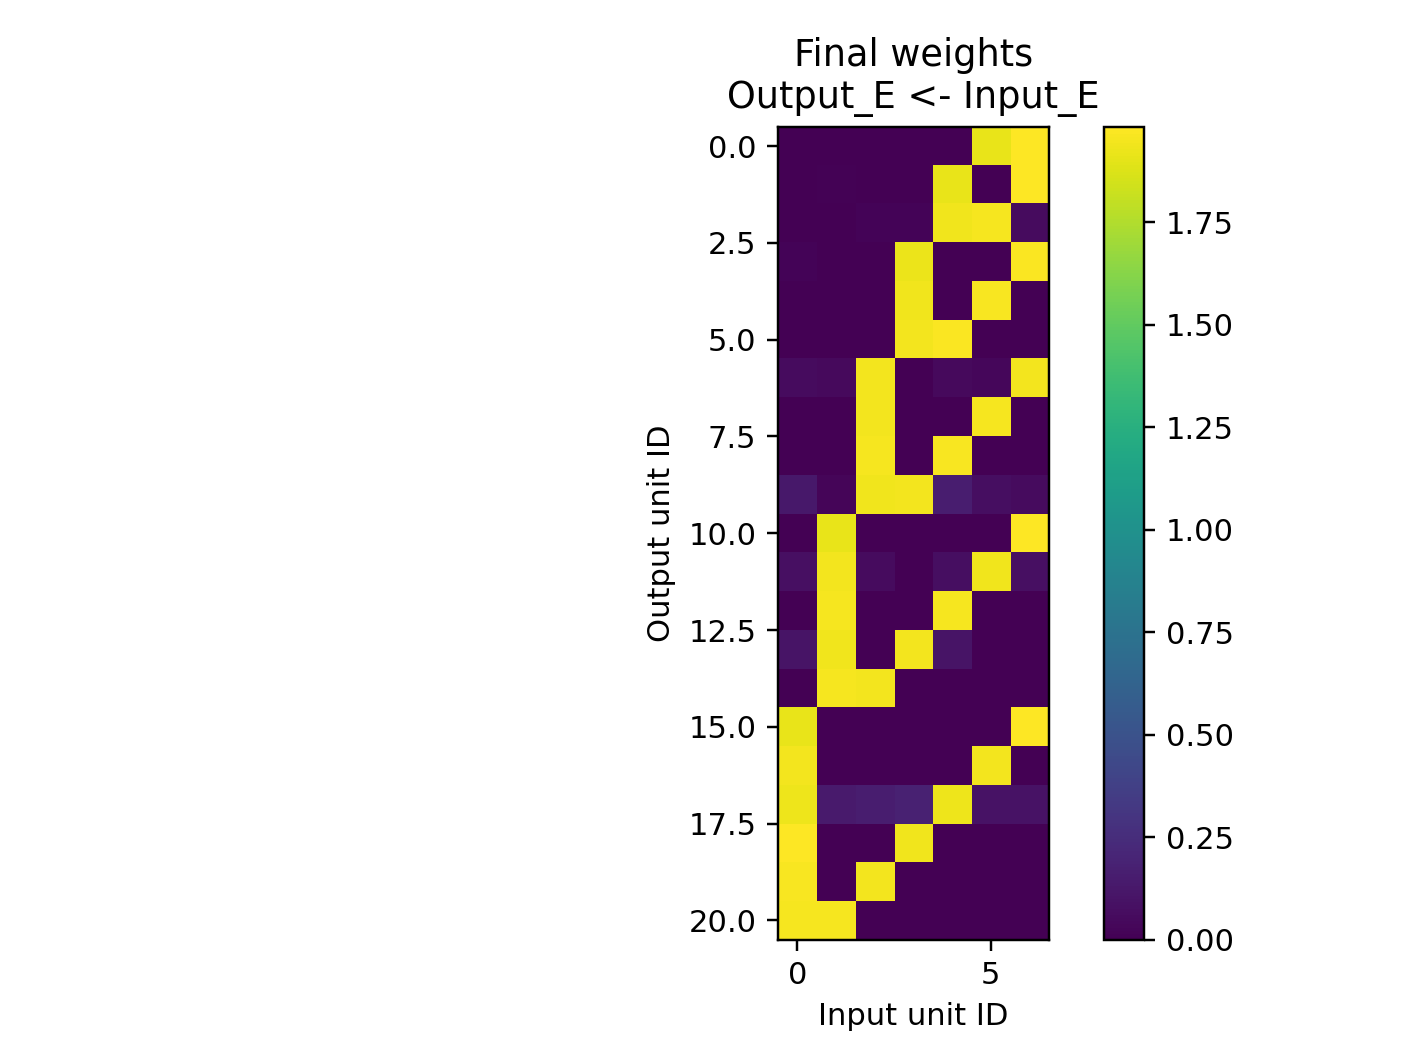

<IPython.core.display.Javascript object>


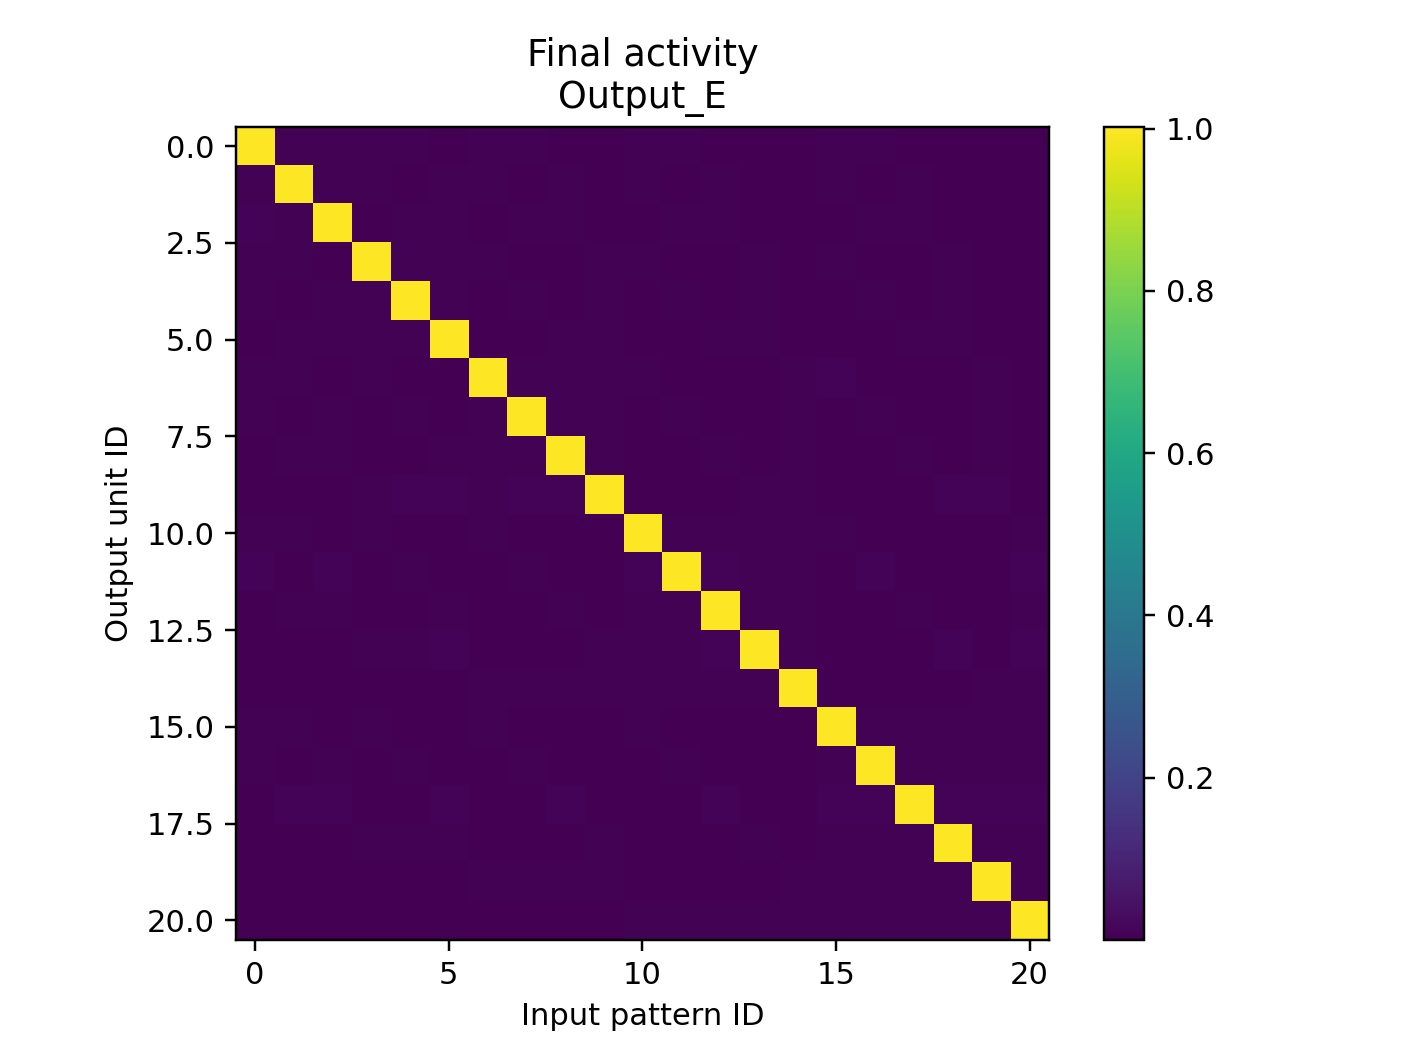

Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


In [8]:
plt.figure()
plt.plot(network.loss_history)
plt.xlabel('Training steps')
plt.ylabel('MSE loss')
plt.title('Training loss')

plt.figure()
plt.imshow(network.layers['Output'].populations['E'].projections['Input']['E'].weight.data)
plt.colorbar()
plt.xlabel('Input unit ID')
plt.ylabel('Output unit ID')
plt.title('Final weights\nOutput_E <- Input_E')

plt.figure()
plt.imshow(network.layers['Output'].populations['E'].activity_history[network.sorted_sample_indexes,-1,:][-dataset.shape[0]:,:].T)
plt.colorbar()
plt.xlabel('Input pattern ID')
plt.ylabel('Output unit ID')
plt.title('Final activity\nOutput_E')

for i, layer in enumerate(network.layers.values()):
    if i >0:
        for population in layer.populations.values():
            print(layer.name, population.name, population.bias)